In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:
def bfs(grid, start, weight, height):
    queue = deque([start])
    visited = set()
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    while queue:
        x, y = queue.popleft()
        visited.add((x, y))

        if check_submatrix(grid, x, y, weight, height):
            return (x, y)

        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy

            if 0 <= new_x < grid.shape[0] and 0 <= new_y < grid.shape[1] and (new_x, new_y) not in visited:
                queue.append((new_x, new_y))
                visited.add((new_x, new_y))

    return None

def check_submatrix(grid, x, y, weight, height):
    if x + weight-1 >= grid.shape[0] or y +height-1 >= grid.shape[1]:
        return False

    submatrix = grid[x : x + weight, y : y + height]
    return np.all(submatrix == 0)

In [3]:
m = 10
n = 10

grid = np.zeros((m,n), dtype=int)

# 在 (2, 3) 和 (3, 2) 的位置设置为1
value = 1

dx = 2
dy = 3

grid[2:2+dx,3:3+dy] = value
grid[8:8+dx,2:2+dy] = value

# 从 (0, 0) 开始进行广度优先搜索
start = (2, 3)
dX = np.array([5,2,2,1,1])
dY = np.array([5,3,3,1,1])

for i in range(len(dX)):
    dx = dX[i]
    dy = dY[i]
    result = bfs(grid, start,dx,dy)
    if(result == None ):
        break

    value += 1
    x = result[0]
    y = result[1]
    grid[x:x+dx,y:y+dy] = value
    start = result


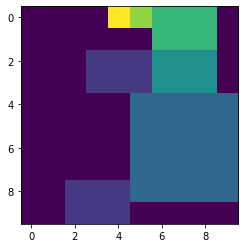

In [4]:
plt.imshow(grid)
plt.show()